In [1]:
import glob
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def parse_res(folder):
    result_files = glob.glob(os.path.join(folder,'results_delay*.txt'))
    res = []
    for f in result_files:
        with open(f, 'r') as file:
            lines = file.readlines()

    
        a = map(lambda x: x.split(' ')[-1].strip(), lines)
        #remove empty strings
        a = filter(lambda x: x != '', a)
        a = map(lambda x: float(x), a)
        res += list(a)

    return res

In [10]:
def parse_to_df(path):
    #get all the folders
    folders = glob.glob(os.path.join(path, '*'))

    dfs = []

    for folder in folders:
        #get the number of ues
        print(folder)
        match = re.search(r"ue(\d+)", folder)
        numUEs = int(match.group(1))

        res = parse_res(folder)

        arr = np.array(res)
        q_high = np.quantile(arr, .99)
        q_low = np.quantile(arr, .01)
        print(arr.min(), arr.max())
        print(q_high, q_low)
        arr = arr[(arr > q_low) & (arr < q_high)]
        print(arr.min(), arr.max())
        # print unique values
        unique, counts = np.unique(arr, return_counts=True)

        print(np.min(counts))

        dfs.append(pd.DataFrame({'delay': res, 'numUEs': numUEs}))



    df = pd.concat(dfs)
    df['scenario'] = path

    # dump the df to pickle
    df.to_pickle(f'df_{path}.pkl')

    return df




In [11]:
ue_ue_df = parse_to_df(path = 'ue-ue-multi')
ue_server_df = parse_to_df(path = 'ue-server-multi')


ue-ue-multi/sim2_ue18
0.010918191725 0.034781493155
0.020591060974 0.013012885477
0.013013255634 0.020590380566
1
ue-ue-multi/sim14_ue126
0.013 12.325026873548
1.2507076271058004 0.013873601893
0.013873621589 1.250705873637
1
ue-ue-multi/sim8_ue72
0.013 1.360166184347
0.27046855605759995 0.013388029004
0.013388054498 0.27046833981
1
ue-ue-multi/sim6_ue54
0.013 0.735839656533
0.16800280538433 0.01324423966
0.01324425347 0.168002689572
1
ue-ue-multi/sim3_ue27
0.011070637734 0.120014536905
0.028934122566339992 0.013023943468
0.013024064125 0.028934002612
1
ue-ue-multi/sim9_ue81
0.013 1.66635575585
0.34238718029899995 0.0134726164172
0.013472714656 0.342387023981
1
ue-ue-multi/sim10_ue90
0.013 2.192864558616
0.4190589547588216 0.013563967556
0.013564085315 0.419057230733
1
ue-ue-multi/sim17_ue153
0.013 136.336572366999
9.677767902783456 0.01414895400112
0.014148982228 9.677579562261
1
ue-ue-multi/sim5_ue45
0.013 0.619597845546
0.11616097984663999 0.013173344122
0.013173355334 0.11616090563

In [4]:
# load the df from pickle
ue_ue_df = pd.read_pickle('df_ue-ue-multi.pkl')
ue_server_df = pd.read_pickle('df_ue-server-multi.pkl')

In [3]:
ue_ue_df.groupby('numUEs').describe()
ue_server_df.groupby('numUEs').describe()

NameError: name 'ue_ue_df' is not defined

In [6]:
def filter_outliers(df, quantile=0.99):
    return df[df["delay"] <= df.groupby("numUEs")["delay"].transform(lambda x: x.quantile(quantile))]


In [7]:
# filter out the outliers 99th percentile
ue_ue_filtered = filter_outliers(ue_ue_df)
ue_server_filtered = filter_outliers(ue_server_df)

In [6]:
ue_ue_filtered.groupby('numUEs').describe()

delay                                                              \
            count      mean       std       min       25%       50%       75%   
numUEs                                                                          
9        230800.0  0.014412  0.002081  0.009078  0.013314  0.013649  0.013953   
18       484088.0  0.014073  0.001289  0.010918  0.013359  0.013694  0.014210   
27       746711.0  0.015237  0.002627  0.011071  0.013539  0.014207  0.015880   
36       993443.0  0.022313  0.009999  0.011358  0.015126  0.019174  0.025778   
45      1251589.0  0.030017  0.017410  0.013000  0.017735  0.024368  0.036192   
54      1511589.0  0.038248  0.025781  0.013000  0.020245  0.029885  0.047263   
63      1768128.0  0.044827  0.033261  0.010720  0.021854  0.033860  0.055888   
72      2023937.0  0.051857  0.041042  0.013000  0.023632  0.038333  0.065250   
81      2297058.0  0.059918  0.050250  0.013000  0.025859  0.043414  0.075550   
90      2549229.0  0.068037  0.060105  0.013000  0.027887  0.048228  0.085735   
99      2798733.0  0.077475  0.073503  0.013000  0.029843  0.053150  0.096751   
108     3059699.0  0.088673  0.092955  0.013000  0.031614  0.058283  0.108877   
117     3311021.0  0.098483  0.106677  0.013000  0.033847  0.063655  0.120518   
126     3578197.0  0.109236  0.126904  0.013000  0.035995  0.069104  0.131972   
135     3835511.0  0.132142  0.220655  0.009338  0.039151  0.076679  0.148067   
144     4074946.0  0.138536  0.233376  0.013000  0.040429  0.080319  0.156183   
153     4337004.0  0.163002  0.387525  0.013000  0.043125  0.086847  0.170678   

                  
             max  
numUEs            
9       0.020747  
18      0.020591  
27      0.028934  
36      0.071807  
45      0.116161  
54      0.168003  
63      0.218154  
72      0.270468  
81      0.342387  
90      0.419057  
99      0.540942  
108     0.775086  
117     0.907315  
126     1.250706  
135     3.717082  
144     4.757470  
153     9.677580

In [25]:
ue_server_filtered.groupby('numUEs').describe()

delay                                                              \
            count      mean       std       min       25%       50%       75%   
numUEs                                                                          
9        256890.0  0.009269  0.002010  0.006740  0.008306  0.008574  0.008859   
18       512361.0  0.008640  0.000950  0.004012  0.008252  0.008506  0.008765   
27       776172.0  0.008649  0.000962  0.004615  0.008253  0.008513  0.008773   
36      1032457.0  0.008971  0.001626  0.004192  0.008279  0.008549  0.008816   
45      1286966.0  0.008730  0.001168  0.004855  0.008259  0.008528  0.008787   
54      1547960.0  0.008876  0.001476  0.004806  0.008263  0.008535  0.008801   
63      1800569.0  0.009040  0.001737  0.004079  0.008280  0.008548  0.008824   
72      2071388.0  0.008889  0.001510  0.004037  0.008266  0.008529  0.008797   
81      2324905.0  0.009095  0.001840  0.004223  0.008280  0.008551  0.008833   
90      2579718.0  0.009240  0.002023  0.004134  0.008294  0.008574  0.008858   
99      2833080.0  0.009296  0.002122  0.004284  0.008293  0.008578  0.008857   
108     3100943.0  0.009035  0.001734  0.004170  0.008274  0.008548  0.008819   
117     3343595.0  0.009169  0.001952  0.004155  0.008284  0.008563  0.008843   
126     3605893.0  0.009174  0.001976  0.004182  0.008280  0.008560  0.008841   
135     3868939.0  0.009205  0.002003  0.004629  0.008281  0.008559  0.008842   
144     4126575.0  0.009081  0.001798  0.004184  0.008275  0.008550  0.008830   
153     4369298.0  0.009179  0.001951  0.004001  0.008282  0.008565  0.008845   

                  
             max  
numUEs            
9       0.014996  
18      0.014755  
27      0.014717  
36      0.014940  
45      0.014836  
54      0.014917  
63      0.014989  
72      0.014926  
81      0.020139  
90      0.020177  
99      0.020342  
108     0.014971  
117     0.020207  
126     0.020288  
135     0.020216  
144     0.018001  
153     0.020153

In [27]:
ue_server_df.groupby('numUEs').describe()

delay                                                              \
            count      mean       std       min       25%       50%       75%   
numUEs                                                                          
9        259458.0  0.009386  0.002328  0.006740  0.008308  0.008583  0.008871   
18       517537.0  0.008714  0.001217  0.004012  0.008255  0.008512  0.008771   
27       783990.0  0.008719  0.001200  0.004615  0.008254  0.008516  0.008778   
36      1042792.0  0.009055  0.001843  0.004192  0.008281  0.008554  0.008824   
45      1299962.0  0.008804  0.001394  0.004855  0.008261  0.008533  0.008794   
54      1563589.0  0.008964  0.001737  0.004806  0.008265  0.008541  0.008809   
63      1818706.0  0.009150  0.002174  0.004079  0.008283  0.008553  0.008831   
72      2092296.0  0.008976  0.001757  0.004037  0.008268  0.008534  0.008806   
81      2348387.0  0.009215  0.002199  0.004223  0.008283  0.008558  0.008841   
90      2605773.0  0.009367  0.003042  0.004134  0.008297  0.008581  0.008867   
99      2861695.0  0.009447  0.003436  0.004284  0.008296  0.008584  0.008867   
108     3132251.0  0.009139  0.002063  0.004170  0.008277  0.008554  0.008827   
117     3377367.0  0.009292  0.002337  0.004155  0.008287  0.008570  0.008850   
126     3642312.0  0.009304  0.002570  0.004182  0.008283  0.008566  0.008849   
135     3908020.0  0.009331  0.002399  0.004629  0.008284  0.008565  0.008850   
144     4168243.0  0.009201  0.002185  0.004184  0.008277  0.008556  0.008839   
153     4413431.0  0.009328  0.004797  0.004001  0.008285  0.008571  0.008853   

                  
             max  
numUEs            
9       0.038883  
18      0.026989  
27      0.026772  
36      0.032870  
45      0.026976  
54      0.032648  
63      0.308831  
72      0.026979  
81      0.038970  
90      1.008663  
99      1.008928  
108     0.314240  
117     0.314761  
126     1.017516  
135     0.174681  
144     0.314739  
153     1.889036

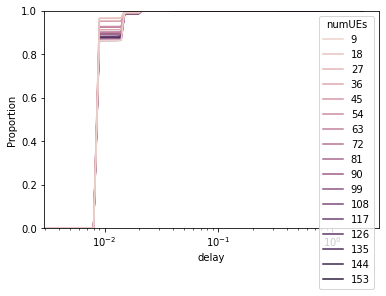

In [7]:
# plot cdf 
sns.ecdfplot(data=ue_server_df, x="delay", hue="numUEs")
plt.xscale('log')


In [8]:
merged_df = pd.concat([ue_ue_filtered, ue_server_filtered])

In [9]:

colors = (250, 70, 50), (350, 70, 50)
cmap = sns.blend_palette(colors, input="husl", as_cmap=True)
sns.displot(
    merged_df,
    x="delay", col="numUEs", hue="scenario",
    kind="ecdf", aspect=.75, linewidth=2,
)

: 

: 